<a href="https://colab.research.google.com/github/Icetiger1/python/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import LabelEncoder #кодирование категориальных признаков
from sklearn.model_selection import train_test_split #разделение выборки на тестовую и обучающую
from sklearn.model_selection import GridSearchCV #метод целенаправленного перебора гиперпараметров с целью минимизации ошибки

#ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

#metrics
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             auc,
                             roc_curve,
                             roc_auc_score)

#pickle ля сохрпанения и загрузки моделей
import pickle

#Загрузка данных

In [ ]:
!git clone https://github.com/Lasttrader/DA_repo

Cloning into 'DA_repo'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 63 (delta 1), reused 1 (delta 0), pack-reused 58
Receiving objects: 100% (63/63), 31.42 MiB | 15.58 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
path = '/content/DA_repo/bank.csv'

In [ ]:
data = pd.read_csv(path, sep =';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#Анализ данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
#числовые признаки
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
#категориальные признаки
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


#Числовые признаки

In [ ]:
num_cols = data.describe().columns.to_list()

In [ ]:
#датафрейм с числовыми признаками
num_data = data[num_cols]

In [ ]:
num_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


#Категориальные признаки

In [ ]:
cat_cols = data.describe(include = 'object').columns.to_list()

In [ ]:
cat_data = data[cat_cols]
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


In [ ]:
le = LabelEncoder()

for i in cat_cols:
  cat_data[i + '_LE'] = le.fit_transform(cat_data[i])

cat_data.head()

<ipython-input-24-5a5db7c646b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i + '_LE'] = le.fit_transform(cat_data[i])
<ipython-input-24-5a5db7c646b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i + '_LE'] = le.fit_transform(cat_data[i])
<ipython-input-24-5a5db7c646b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,job,marital,education,default,housing,loan,contact,month,poutcome,y,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,contact_LE,month_LE,poutcome_LE,y_LE
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no,10,1,0,0,0,0,0,10,3,0
1,services,married,secondary,no,yes,yes,cellular,may,failure,no,7,1,1,0,1,1,0,8,0,0
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no,4,2,2,0,1,0,0,0,0,0
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no,4,1,2,0,1,1,2,6,3,0
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no,1,1,1,0,1,0,2,8,3,0


In [ ]:
cat_data_clean = cat_data.drop(cat_cols, axis = 1)
cat_data_clean.head()

,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,contact_LE,month_LE,poutcome_LE,y_LE
0,10,1,0,0,0,0,0,10,3,0
1,7,1,1,0,1,1,0,8,0,0
2,4,2,2,0,1,0,0,0,0,0
3,4,1,2,0,1,1,2,6,3,0
4,1,1,1,0,1,0,2,8,3,0


#работа с пропусками

#X и y

##объединение датасетов с категориальными и числовыми признаками

In [ ]:
dataset = pd.concat([num_data, cat_data_clean], axis = 1) #объединение датасетов
dataset.head()

,age,balance,day,duration,campaign,pdays,previous,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,contact_LE,month_LE,poutcome_LE,y_LE
0,30,1787,19,79,1,-1,0,10,1,0,0,0,0,0,10,3,0
1,33,4789,11,220,1,339,4,7,1,1,0,1,1,0,8,0,0
2,35,1350,16,185,1,330,1,4,2,2,0,1,0,0,0,0,0
3,30,1476,3,199,4,-1,0,4,1,2,0,1,1,2,6,3,0
4,59,0,5,226,1,-1,0,1,1,1,0,1,0,2,8,3,0


In [ ]:
dataset.shape

(4521, 17)

In [ ]:
#распределение целевой переменной
dataset['y_LE'].value_counts()

0    4000
1     521
Name: y_LE, dtype: int64

In [ ]:
y = np.array(dataset['y_LE'])
X = np.array(dataset.drop('y_LE', axis =1))

In [ ]:
X[:2]

array([[  30, 1787,   19,   79,    1,   -1,    0,   10,    1,    0,    0,
           0,    0,    0,   10,    3],
       [  33, 4789,   11,  220,    1,  339,    4,    7,    1,    1,    0,
           1,    1,    0,    8,    0]])

In [ ]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

#train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, #размер тестовой выборки
                                                    shuffle = True,  #перемешивание данных (нельзя перемешивать временные ряды)
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3616, 16)
(905, 16)
(3616,)
(905,)


#ML

##metrics

In [ ]:
#функция для расчёта метрик
def get_metrics(model, X_test, y_test):
  #прогноз
  y_pred = model.predict(X_test)
  print(f'accuracy = {accuracy_score(y_test, y_pred)}')
  print(f'precision = {precision_score(y_test, y_pred)}')
  print(f'recall = {recall_score(y_test, y_pred)}')
  print(f'f1 = {f1_score(y_test, y_pred)}')
  print(f'confusion_matrix \n {confusion_matrix(y_test, y_pred)}')
  print(f'ROC_AUC = {roc_auc_score(y_test, y_pred)}')

  #FRP, TPR
  fpr, tpr, threshholds = roc_curve(y_test, y_pred)
  #строим график roc_auc
  roc_auc = auc(fpr, tpr)
  #plot
  plt.plot(fpr, tpr, 'b', label = roc_auc)
  plt.plot([0,1], [0,1], 'r')
  plt.title('roc_auc')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()
  plt.show()

#classification

##kNN

лучшая точность = 0.888828010973308
лучшая комбинация гиперпараметров = {'metric': 'minkowski', 'n_neighbors': 20}
accuracy = 0.8906077348066298
precision = 0.4827586206896552
recall = 0.14285714285714285
f1 = 0.2204724409448819
confusion_matrix 
 [[792  15]
 [ 84  14]]
ROC_AUC = 0.5621348911311737


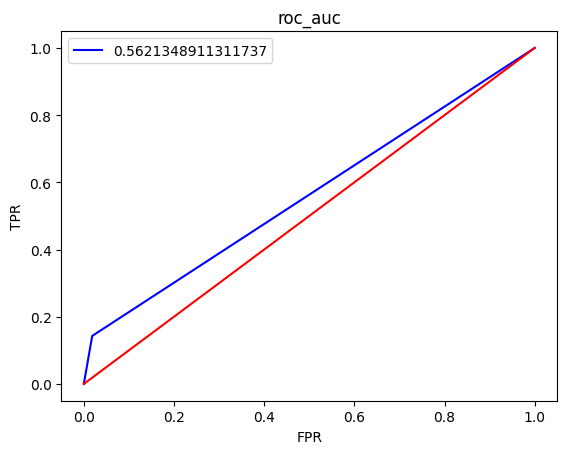

In [ ]:
#инициализируем алгоритм ML
knn = KNeighborsClassifier()
#grid params
grid_params = {'n_neighbors' : [16,17,18,19,20,21,2,23,24,25],
               'metric' : ['minkowski', 'manhattan']}
#grid search
grid_kNN = GridSearchCV(knn,
                        grid_params,
                        scoring = 'accuracy',
                        cv = 5)
#обучение сетки
grid_kNN.fit(X_train, y_train)

print(f'лучшая точность = {grid_kNN.best_score_}')
print(f'лучшая комбинация гиперпараметров = {grid_kNN.best_params_}')

get_metrics(grid_kNN, X_test, y_test)

##Bayes

лучшая точность = 0.8852372328312816
лучшая комбинация гиперпараметров = {'var_smoothing': 1e-05}
accuracy = 0.8917127071823204
precision = 0.5
recall = 0.3673469387755102
f1 = 0.42352941176470593
confusion_matrix 
 [[771  36]
 [ 62  36]]
ROC_AUC = 0.6613686366740004


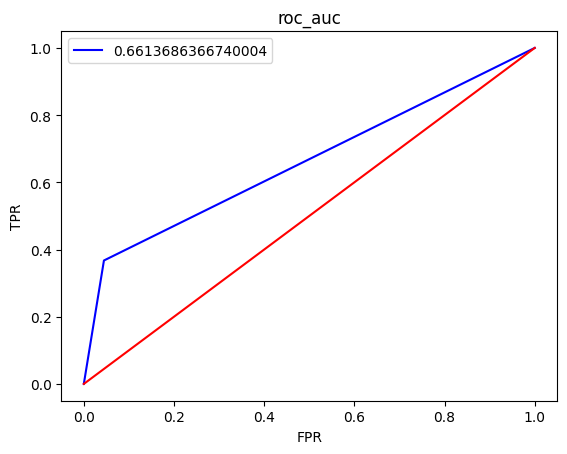

In [ ]:
#инициализируем алгоритм ML GaussianNB
gaussNB = GaussianNB()
#grid params
grid_params = {'var_smoothing' : [1e-9, 1e-5, 1e-8, 1e-10]}
#grid search
grid_gaussNB = GridSearchCV(gaussNB,
                        grid_params,
                        scoring = 'accuracy',
                        cv = 5)
#обучение сетки
grid_gaussNB.fit(X_train, y_train)

print(f'лучшая точность = {grid_gaussNB.best_score_}')
print(f'лучшая комбинация гиперпараметров = {grid_gaussNB.best_params_}')

get_metrics(grid_gaussNB, X_test, y_test)

лучшая точность = 0.8595126200683157
лучшая комбинация гиперпараметров = {'alpha': 1e-05, 'binarize': 0.1, 'fit_prior': True}
accuracy = 0.8640883977900552
precision = 0.2549019607843137
recall = 0.1326530612244898
f1 = 0.174496644295302
confusion_matrix 
 [[769  38]
 [ 85  13]]
ROC_AUC = 0.5427825405255039


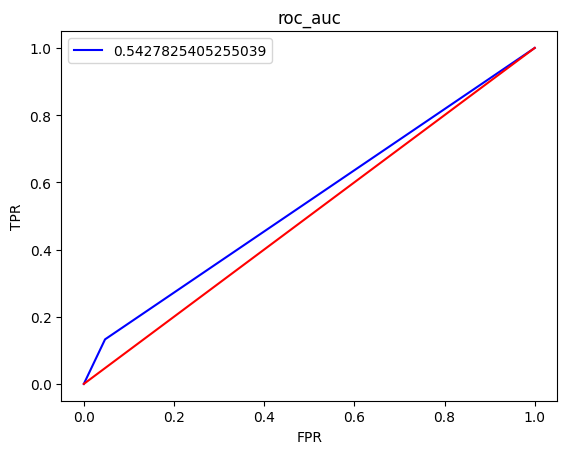

In [ ]:
#инициализируем алгоритм ML BernoulliNB
bernNB = BernoulliNB()
#grid params
grid_params = {'alpha' : [1, 1e-5, 2],
               'binarize' : [0.1, 0.2],
               'fit_prior' : [True, False]}
#grid search
grid_bernNB = GridSearchCV(bernNB,
                        grid_params,
                        scoring = 'accuracy',
                        cv = 5)
#обучение сетки
grid_bernNB.fit(X_train, y_train)

print(f'лучшая точность = {grid_bernNB.best_score_}')
print(f'лучшая комбинация гиперпараметров = {grid_bernNB.best_params_}')

get_metrics(grid_bernNB, X_test, y_test)

In [ ]:
#инициализируем алгоритм ML MultinomialNB (с положительными признаками)
multinNB = MultinomialNB()
#grid params
grid_params = {'alpha' : [1, 1e-5, 2],
               'fit_prior' : [True, False]}
#grid search
grid_multinNB = GridSearchCV(multinNB,
                        grid_params,
                        scoring = 'accuracy',
                        cv = 5)
#обучение сетки
grid_multinNB.fit(X_train, y_train)

print(f'лучшая точность = {grid_multinNB.best_score_}')
print(f'лучшая комбинация гиперпараметров = {grid_multinNB.best_params_}')

get_metrics(grid_multinNB, X_test, y_test)

#Прогноз от модели

In [ ]:
#Прогноз от модели
y_pred = grid_kNN.predict([[ 33,4789,11,220, 1,339, 4, 7, 1,1,0, 1, 1,0,8,0]])
y_pred

array([0])

In [ ]:
le.inverse_transform(y_pred) #обратное преобразоване категориального признака

array(['no'], dtype=object)

#сохранение и загрузка моделей

In [ ]:
#Сохраняем модель
with open('kNN.pkl', 'wb') as f:
  pickle.dump(grid_kNN, f)

In [ ]:
#загружаем модель
with open('kNN.pkl', 'rb') as f:
  kNN_loaded = pickle.load(f)

In [ ]:
grid_kNN.predict(X_test[:10])  #прогноз исходной модели

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
kNN_loaded.predict(X_test[:10])  #прогноз загруженной модели

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])